## Практическое занятие 5
## Математический анализ
## Численное решение нелинейных уравнений: nsolve
https://docs.sympy.org/latest/modules/solvers/solvers.html?highlight=nsolve#sympy.solvers.solvers.nsolve

#### Уравнение в форме $f(x)=0$

In [365]:
import numpy as np
import sympy
from sympy import nsolve,  Symbol, symbols, S, solve, solveset, latex, fraction, Eq, simplify, Intersection
import matplotlib.pyplot as plt
from sympy.calculus.util import continuous_domain
from IPython.display import display, Latex
import math
%matplotlib inline

### Задача 1
Решить уравнение $𝑥^4−e^x=0$ при $-2 \le x \le 2$, построить график левой части, отметить точки пересечения с осью ОХ.

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

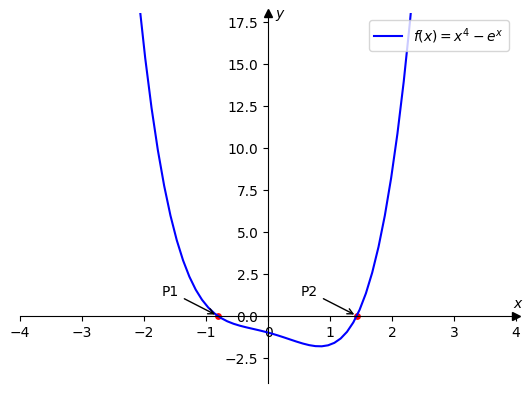

In [385]:
x = Symbol('x')

def func(x, lib = "sympy"):
  if lib == "numpy":
    return x**4 - np.e**x
  elif lib == "sympy":
    return x**4 - sympy.E**x
  return 0

X = np.linspace(-3, 3, 60)
lst_x_dots = sorted([*set(nsolve(func(x), x, x_0) for x_0 in X)])
lst_y_dots = [round(func(x), 4) for x in lst_x_dots]

display(Latex(fr"\text{{Решения уравнения }}{latex(Eq(func(x), 0))}\ \text{{на отрезке [-2, 2]}}:\ {latex(sorted([round(x, 3) for x in lst_x_dots]))}"))
display(Latex(fr"\text{{График функции f(x) = }}{latex(func(x))} :"))

ax = plt.gca()

ax.plot(X, func(X, "numpy"), label = r"$f(x) = x^{4} - e^{x}$", color = "blue")
ax.scatter(lst_x_dots , lst_y_dots, color = "red", s = 15)
for i in range(len(lst_x_dots )):
  ax.annotate(f"P{i + 1}", xy = (lst_x_dots[i], lst_y_dots[i]), xycoords='data',
                xytext = (lst_x_dots[i] - 0.9, lst_y_dots[i] + 1.2), textcoords = 'data',
                arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))

x_lim = (-4, 4)
y_lim = (-4, 18)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
ax.set(ylim = y_lim, xlim = x_lim)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$", rotation = 0)
ax.xaxis.set_label_coords(1.005, 0.235)
ax.yaxis.set_label_coords(0.525, 0.975)
ax.legend(loc = "upper right")

### Задача 2.
Решить уравнение $\sin^2(2x)=\ln x$ при $0< x \le 3$. Построить графики левой и правой части, отметить точку пересечения графиков.

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

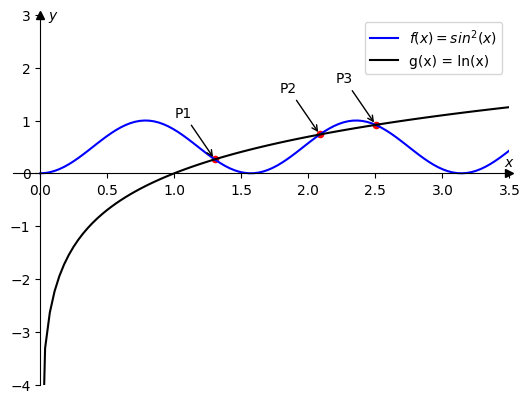

In [386]:
def f(x, lib = "sympy"):
  if lib == "numpy":
    return (np.sin(2 * x))**2
  elif lib == "sympy":
    return (sympy.sin(2*x))**2
  else:
    return 0

def g(x, lib = "sympy"):
  if lib == "numpy":
    return np.log(x)
  elif lib == "sympy":
    return sympy.log(x)
  else:
    return 0

X = np.linspace(0.001, 3.5, 100)
lst_x_dots = sorted([*set(nsolve(f(x) - g(x), x, x_0) for x_0 in [i/2 for i in range(1, 6)])])
lst_y_dots = [round((f(x)), 4) for x in lst_x_dots]

display(Latex(fr"\text{{Решения уравнения }}{latex(Eq(f(x), g(x)))}\ \text{{на полуинтервале (0, 3]}}:\ {latex(sorted([round(x, 3) for x in lst_x_dots]))}"))
display(Latex(fr"\text{{График функций f(x)=}}{latex(f(x))} \text{{ и g(x)=}} {latex(g(x))} :"))

ax = plt.gca()
ax.plot(X, f(X, "numpy"), label = r"$f(x) = sin^{2}(x)$", color = "blue")
ax.plot(X, g(X, "numpy"), label = r"g(x) = ln(x)", color = "black")
ax.scatter(lst_x_dots, lst_y_dots, color = "red", s = 20)
for i in range(len(lst_x_dots )):
  ax.annotate(f"P{i + 1}", xy = (lst_x_dots[i], lst_y_dots[i]), xycoords='data',
                xytext = (lst_x_dots[i] - 0.3, lst_y_dots[i] + 0.8), textcoords = 'data',
                arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))

x_lim = (-0.2, 3.5)
y_lim = (-4, 3)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
ax.set(ylim = y_lim, xlim = x_lim)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$", rotation = 0)
ax.xaxis.set_label_coords(1.00, 0.620)
ax.yaxis.set_label_coords(0.08, 0.975)
ax.legend(loc = "upper right")

### Задача 3.
Решить уравнение $\sin^2(2x^2-7x+6)=3/4$ на $[3, 4]$. Построить графики левой и правой части, отметить точки пересечения графиков.

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

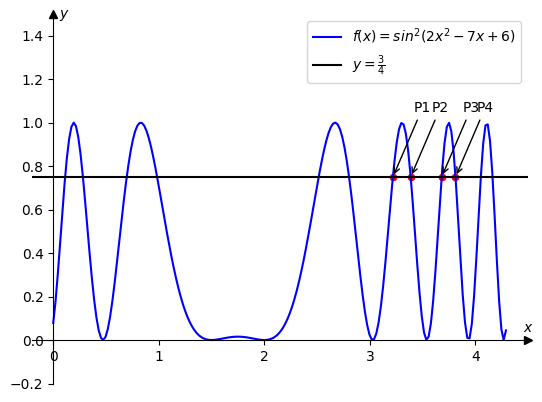

In [387]:
def f(x, lib = "sympy"):
  if lib == "numpy":
    return (np.sin(2*x**2 - 7 * x + 6))**2
  elif lib == "sympy":
    return (sympy.sin(2*x**2 - 7 * x + 6))**2
  return 0

X = np.linspace(0, 4.29, 200)
lst_x_dots = sorted([*set(round(nsolve(Eq(f(x), S(3)/4), x, x_0), 5) for x_0 in [i/10 for i in range(30, 40)] if 3 <= round(nsolve(Eq(f(x), S(3)/4), x, x_0), 5) <= 4)])
lst_y_dots = [round(f(x), 4) for x in lst_x_dots]

display(Latex(fr"\text{{Решения уравнения }}{latex(Eq(f(x), S(3)/4))}\ \text{{на отрезке [3, 4]}}:\ {latex(sorted([round(x, 3) for x in lst_x_dots]))}"))
display(Latex(fr"\text{{Графики функций f(x)=}}{latex(f(x))} \text{{ и y = 3/4 }}:"))

ax = plt.gca()
ax.plot(X, f(X, "numpy"), label = r"$f(x) = sin^{2}(2x^{2} -7x + 6)$", color = "blue")
plt.axhline (y=3/4, label = r"$y = \frac{3}{4}$", color = "black")
ax.scatter(lst_x_dots, lst_y_dots, color = "red", s = 20)
for i in range(len(lst_x_dots )):
  ax.annotate(f"P{i + 1}", xy = (lst_x_dots[i], lst_y_dots[i]), xycoords='data',
                xytext = (lst_x_dots[i] + 0.2, lst_y_dots[i] + 0.3), textcoords = 'data',
                arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))

x_lim = (-0.2, 4.5)
y_lim = (-0.2, 1.5)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
ax.set(ylim = y_lim, xlim = x_lim)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$", rotation = 0)
ax.xaxis.set_label_coords(1.00, 0.17)
ax.yaxis.set_label_coords(0.065, 0.975)
ax.legend(loc = "best")

### Задача 4.
Решить уравнение ${\rm tg}^4(2x^2+1)-10=0$ на интервале $[0, 0.2]$ методом дихотомии. График строить не нужно.

In [ ]:
def f(x):
  return (sympy.tan(2*x**2 + 1))**4 - 10

lst_x_dots = [*set(nsolve(f(x), x, interval, solber = 'biscet') for interval in [[0, 0.1], [0.1, 0.2]])]
display(Latex(fr"\text{{Решения уравнения }}{latex(Eq(f(x), 0))}\ \text{{на отрезке [0, 0.02]}}:\ {latex(sorted([round(x, 5) for x in lst_x_dots]))}"))

### Задача 5.
Решить систему уравнений
$$
\left\{\begin{matrix}
(x - 1)^2 + (y - 2)^2 + (z + 3)^2 = 25\\
x + y + z = 0\\
-2x + 3y - z = 7
\end{matrix}\right.
$$
начальное приближение (0, 0, 0).
Проверить подстановкой.

In [ ]:
x, y, z = symbols('x y z')
lst_syms = [x, y, z]
lst_eq = [Eq((x - 1)**2 + (y - 2)**2 + (z + 3)**2, 25), Eq(x + y + z, 0), Eq(-2 * x + 3 * y - z, 7)]
lst_ans = nsolve(lst_eq, lst_syms, (0,0,0))
display(Latex(fr"\text{{Решения системы уравнений:}}"))
display(*lst_eq)
display(Latex(fr"{latex(lst_syms)}\text{{=}}{latex(lst_ans)}"))
display(Latex(fr"\text{{Проверим полученные решения подстановкой:}}"))
lst_check = [(lst_eq[j].subs({lst_syms[i]:lst_ans[i] for i in range(len(lst_ans))}) if j != 1 else True) for j in range(len(lst_eq))]
display(*lst_check)

### Индивидуальное задание
Построить графики функций $f(x)$ и $g(x)$, уточнить координаты точек пересечения, решая численно соответствующее уравнение. На  графике отметить и подписать буквами $А_1$, $A_2$, ... точки пересечения графиков.  

Вариант $134$
\begin{align*}
    f(x) = - \frac{37 x^{2}}{18} - x + 4 && g(x) = - \frac{3 x^{2} + 2 x + 2}{2}
\end{align*}


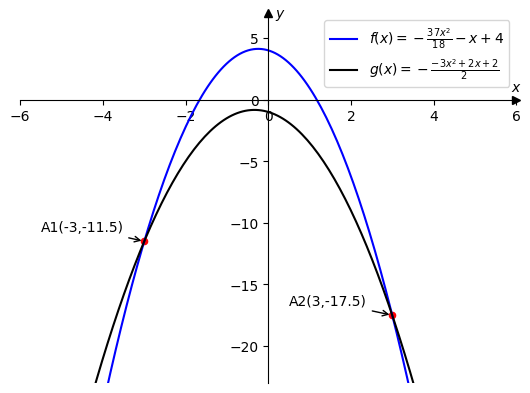

In [390]:
def f(x):
  return -(37 * x**2)/18 - x + 4

def g(x):
  return -(3 * x**2 + 2 * x + 2)/2

X = np.linspace(-6.5, 6.5, 200)
lst_x_dots = sorted([*set(nsolve(f(x) - g(x), x, x_0) for x_0 in [i/10 for i in range(-50, 50)])])
lst_y_dots = [f(x) for x in lst_x_dots]

ax = plt.gca()
ax.plot(X, f(X), label = r"$f(x) = -\frac{37x^{2}}{18} -x + 4$", color = "blue")
ax.plot(X, g(X), label = r"$g(x) = -\frac{-3x^{2} +2x + 2}{2}$", color = "black")
ax.scatter(lst_x_dots, lst_y_dots, color = "red", s = 20)
for i in range(len(lst_x_dots )):
  ax.annotate(f"A{i + 1}({math.trunc(lst_x_dots[i])},{round(lst_y_dots[i], 1)})", xy = (lst_x_dots[i], lst_y_dots[i]), xycoords='data',
                xytext = (lst_x_dots[i] - 2.5, lst_y_dots[i] + 0.8), textcoords = 'data',
                arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))

x_lim = (-6, 6)
y_lim = (-23, 7)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
ax.set(ylim = y_lim, xlim = x_lim)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$", rotation = 0)
ax.xaxis.set_label_coords(1.00, 0.820)
ax.yaxis.set_label_coords(0.525, 0.975)
ax.legend(loc = "best")